<a href="https://colab.research.google.com/github/vanshika7-max/Bike-Sharing-Demand-Prediction/blob/main/Vanshika_Raj_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
SeoulBikeData = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/SeoulBikeData.csv',sep=',',encoding='gbk')


# Print the first 5 rows of the dataframe.
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(癈)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(癈)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
SeoulBikeData.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [7]:
SeoulBikeData.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [8]:
SeoulBikeData.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [9]:
def Holiday_label(row):
  if str(row) == 'Holiday':
    return 1
  else :
    return 0
  

In [10]:
SeoulBikeData['Holiday']=SeoulBikeData.apply(lambda row : Holiday_label(row['Holiday']),axis=1)

SeoulBikeData['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [11]:
SeoulBikeData.rename({"Temperature(癈)": "Temperature",  
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(癈)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall"},  
          axis = "columns", inplace = True) 



# Temperature(癈)	Humidity(%)	Wind speed (m/s)	Visibility (10m)	Dew point temperature(癈)	Solar Radiation (MJ/m2)	Rainfall(mm)	Snowfall (cm)	

In [12]:
SeoulBikeData

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Yes


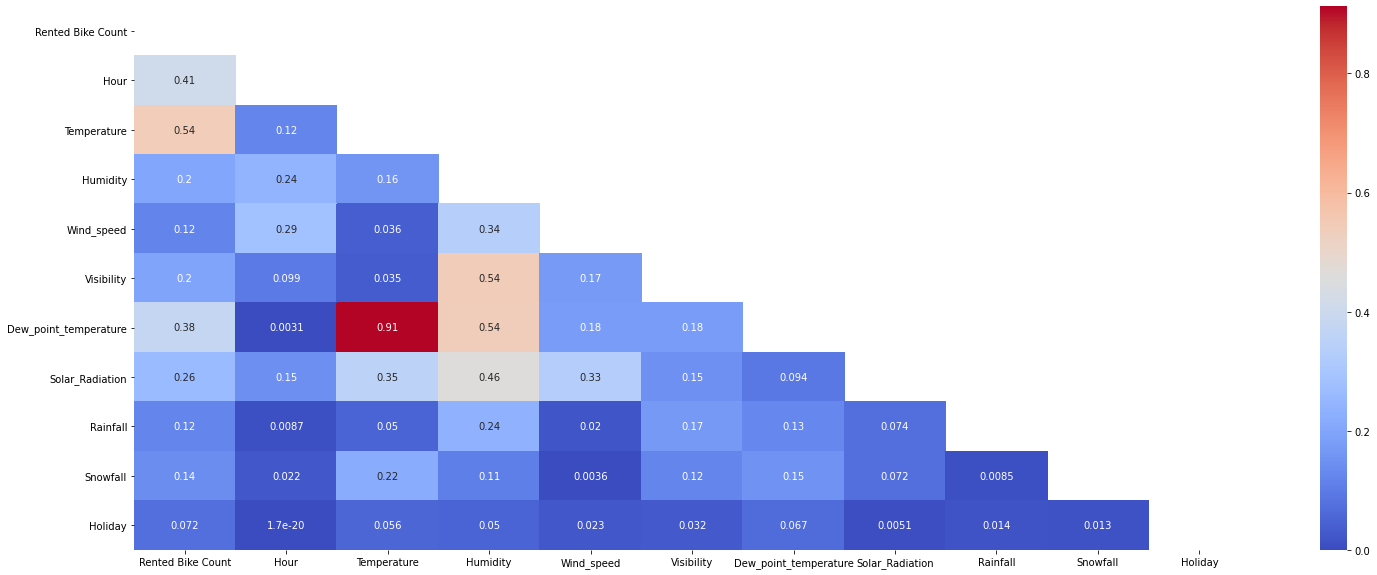

In [13]:
plt.figure(figsize=(25,10))
cor=SeoulBikeData.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')


In [14]:
SeoulBikeData.Seasons

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: object

In [15]:
def Seasons_label(row):
  if str(row) == 'Winter':
    return 0
  elif str(row) == 'Autumn':
    return 1
  elif str(row) == 'Spring':
    return 2
  elif  str(row) == 'Summer':
    return 3
  

In [16]:
SeoulBikeData['Seasons']=SeoulBikeData.apply(lambda row : Seasons_label(row['Seasons']),axis=1)

SeoulBikeData['Seasons'].value_counts()

3    2208
2    2208
1    2184
0    2160
Name: Seasons, dtype: int64

In [17]:
SeoulBikeData

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,Yes


In [18]:
def Function_day(row):
  if str(row) == 'Yes':
    return 1
  else :
    return 0
  

In [19]:
SeoulBikeData['Functioning Day']=SeoulBikeData.apply(lambda row : Function_day(row['Functioning Day']),axis=1)

SeoulBikeData['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [20]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   int64  
 12  Holiday                8760 non-null   int64  
 13  Functioning Day        8760 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 958.2+ 

In [21]:
 #concatenate travel date and travel time column and make a new feature called date.
SeoulBikeData["Date_hour"]=SeoulBikeData["Date"].astype(str)+ " " 
# +SeoulBikeData["Hour"].astype(str)


In [ ]:
def  time_features(df): 

  df["Date_hour"]=pd.to_datetime(df["Date_hour"])
  df["day_of_week"]=df["Date_hour"].dt.dayofweek
  df["day_of_year"]=df["Date_hour"].dt.dayofyear
  df["day_of_month"]=df["Date_hour"].dt.day
  # df["hour"]=df["Date_hour"].dt.hour
  # df["minute"]=df["Date_hour"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["Date_hour"].dt.year
  df["quarter"]=df["Date_hour"].dt.quarter
  df["month"]=df["Date_hour"].dt.month
  return df

In [ ]:
SeoulBikeData1 = time_features(SeoulBikeData)

In [ ]:
SeoulBikeData1

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Date_hour,day_of_week,day_of_year,day_of_month,is_weekend,year,quarter,month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,2017-01-12,3,12,12,0,2017,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,2017-01-12,3,12,12,0,2017,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,2017-01-12,3,12,12,0,2017,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,2017-01-12,3,12,12,0,2017,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,2017-01-12,3,12,12,0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,1,2018-11-30,4,334,30,0,2018,4,11
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,1,2018-11-30,4,334,30,0,2018,4,11
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,1,2018-11-30,4,334,30,0,2018,4,11
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,1,2018-11-30,4,334,30,0,2018,4,11


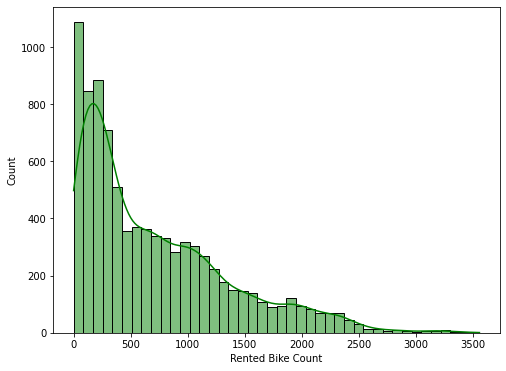

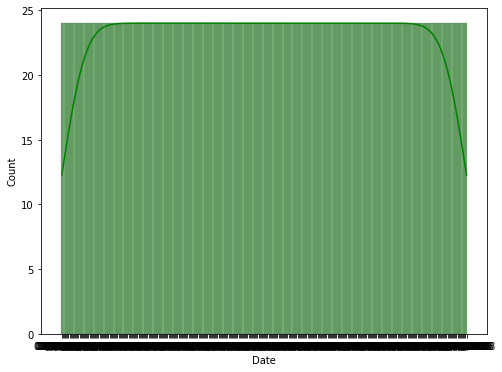

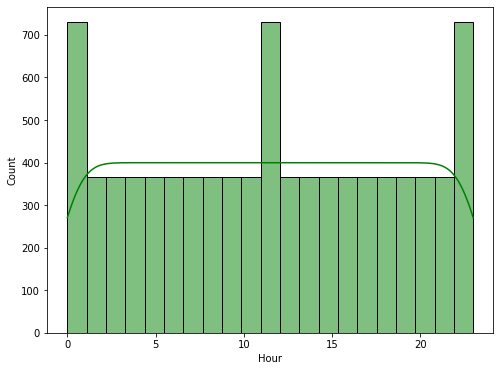

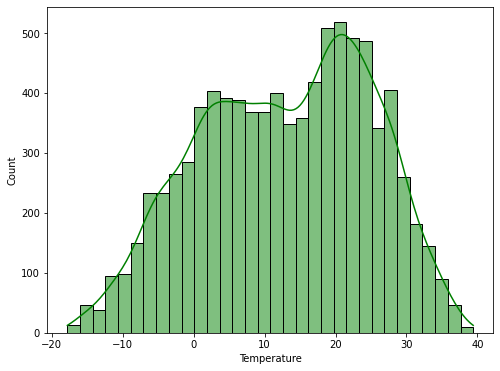

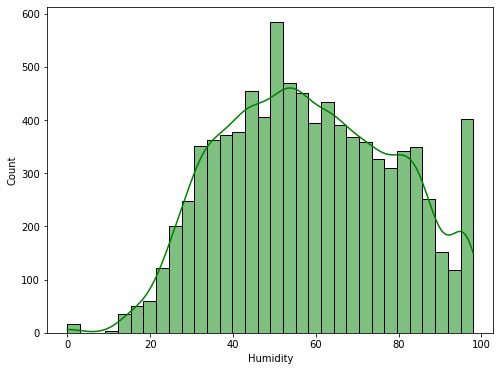

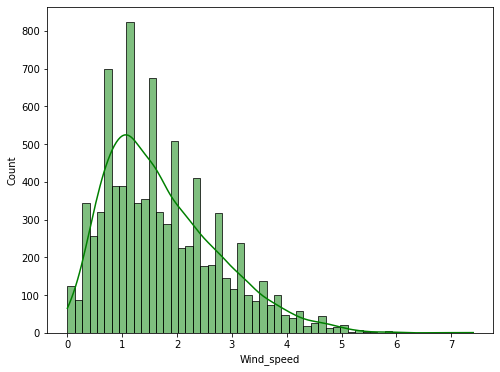

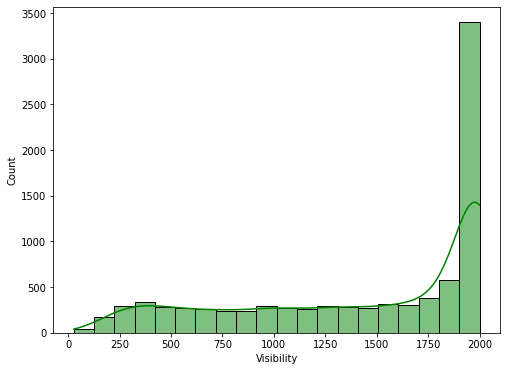

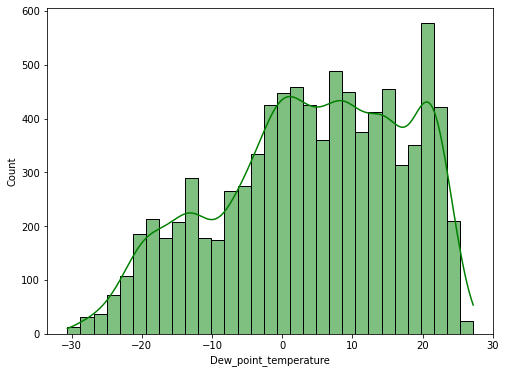

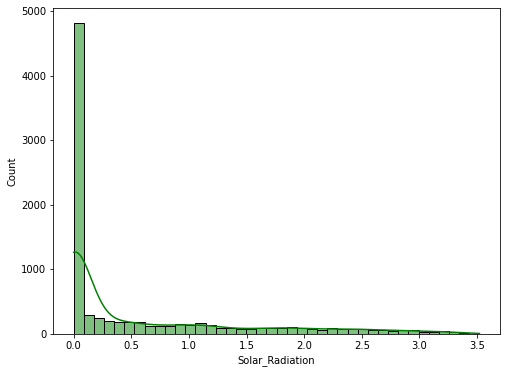

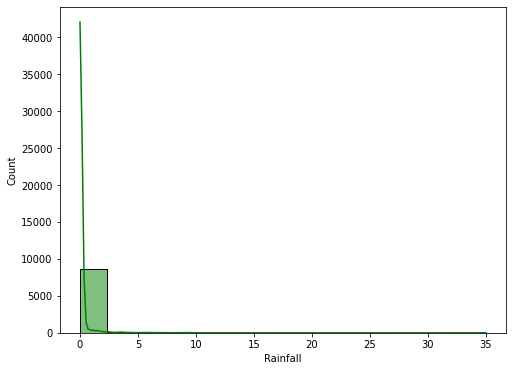

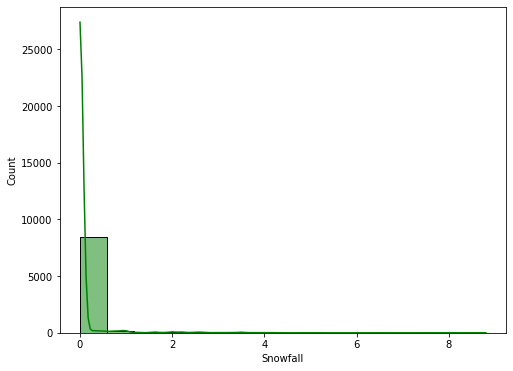

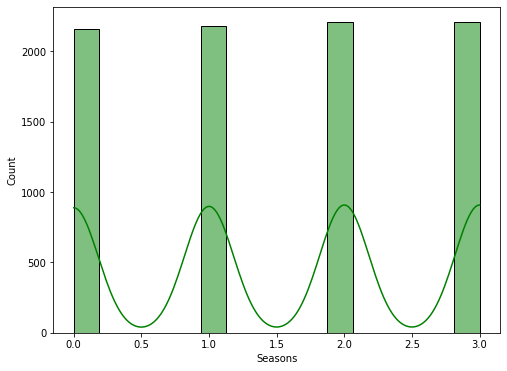

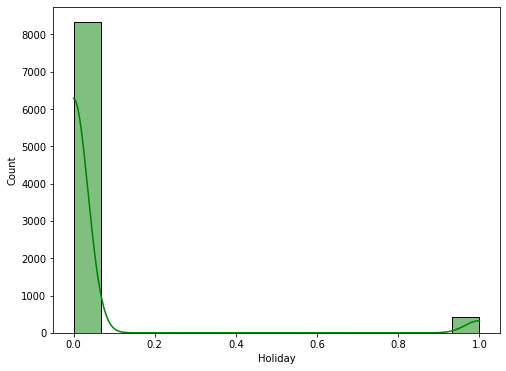

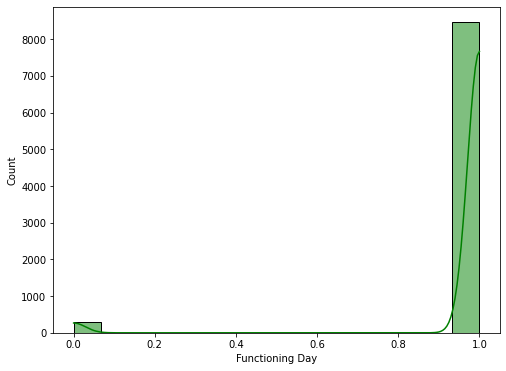

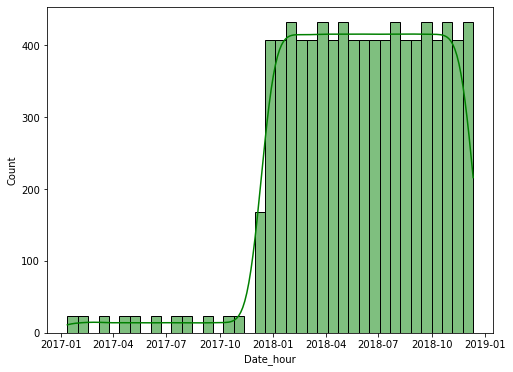

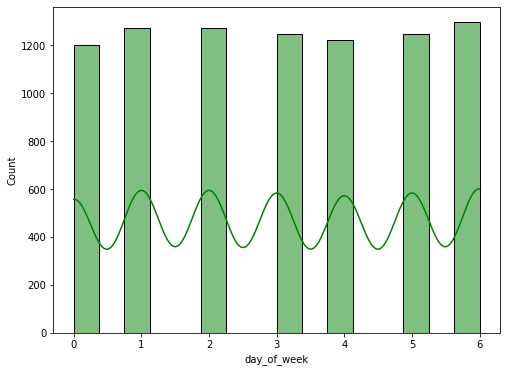

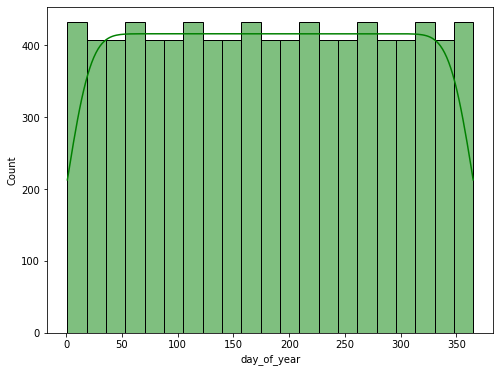

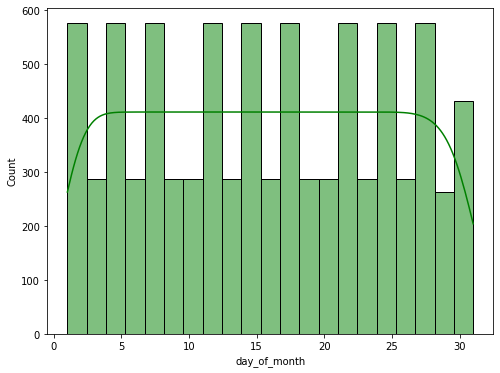

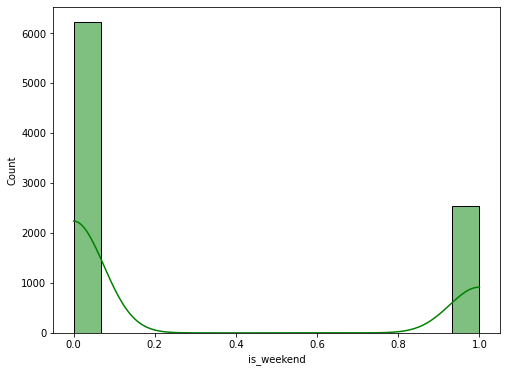

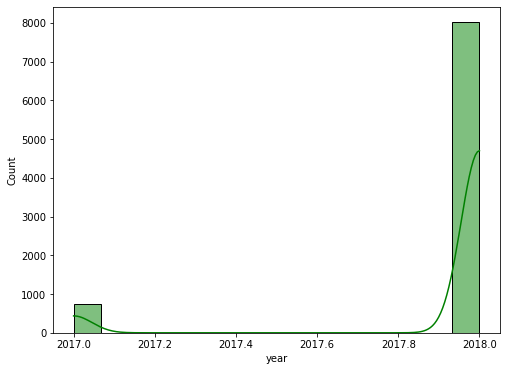

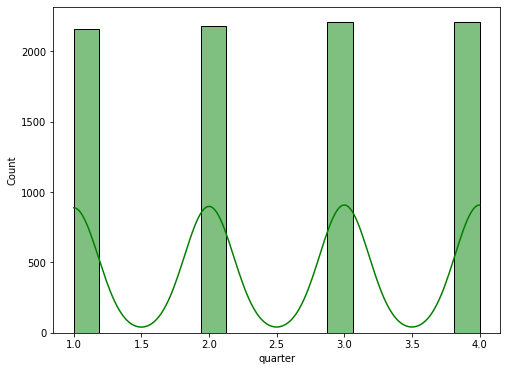

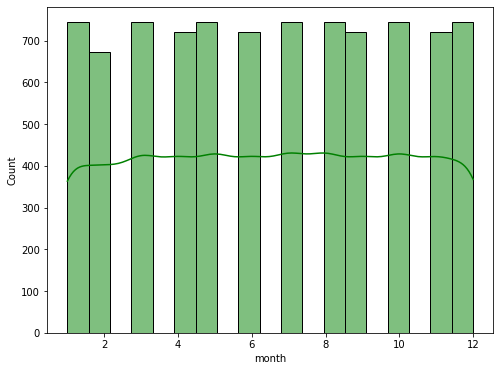

In [ ]:
var = ['Rented Bike Count','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning Day','Date_hour','day_of_week','day_of_year','day_of_month','is_weekend','year','quarter','month']
# Plotting for target variable
for depend in var:
  plt.figure(figsize=(8,6))
  sns.histplot(SeoulBikeData1[depend],color='green',kde=True)
  plt.show()